In [1]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
df = pd.read_csv('WA_Marketing-Campaign.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [4]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [5]:
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [6]:
df.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [7]:
df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

In [8]:
# Group the data by 'Promotion' and count the unique 'LocationID's for each promotion
promotion_location_counts = df.groupby('Promotion')['LocationID'].nunique().reset_index()
promotion_location_counts.columns = ['Promotion', 'Number of Locations']

# Display the table
print(promotion_location_counts)

   Promotion  Number of Locations
0          1                   43
1          2                   47
2          3                   47


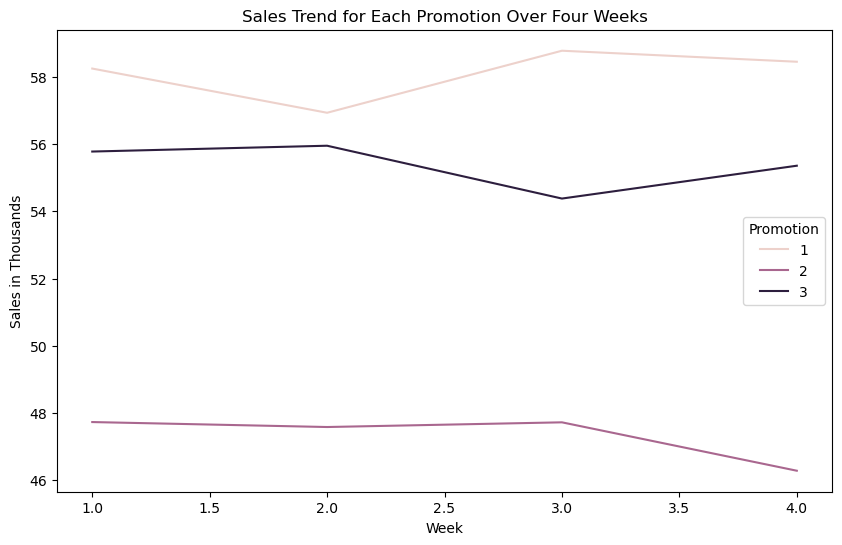

In [9]:
# Line plot for sales trend over four weeks for each promotion
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='week', y='SalesInThousands', hue='Promotion', ci=None)
plt.title('Sales Trend for Each Promotion Over Four Weeks')
plt.xlabel('Week')
plt.ylabel('Sales in Thousands')
plt.show()

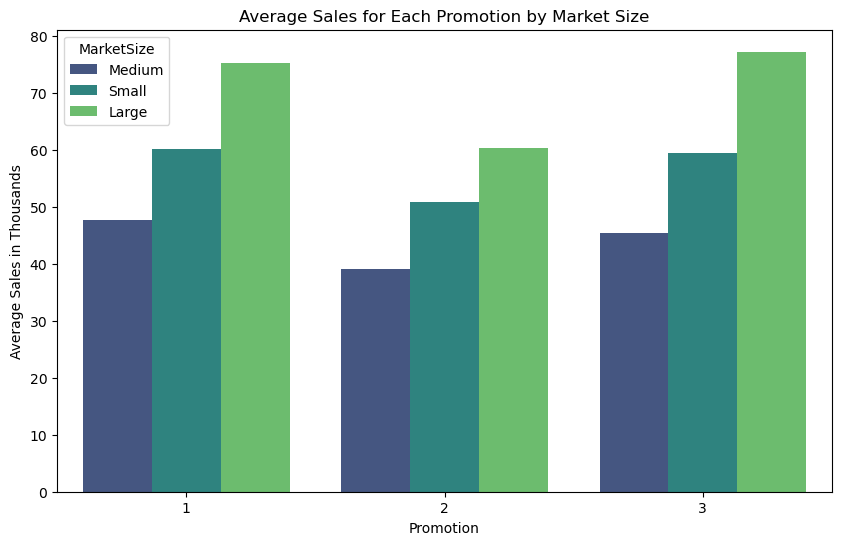

In [10]:
# Bar plot for average sales for each promotion by market size
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Promotion', y='SalesInThousands', hue='MarketSize', ci=None, palette='viridis')
plt.title('Average Sales for Each Promotion by Market Size')
plt.xlabel('Promotion')
plt.ylabel('Average Sales in Thousands')
plt.show()

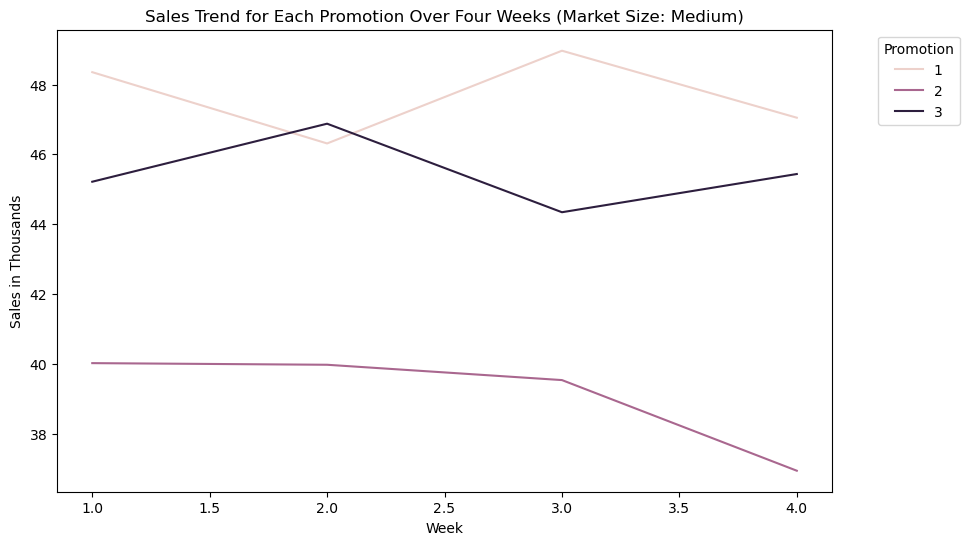

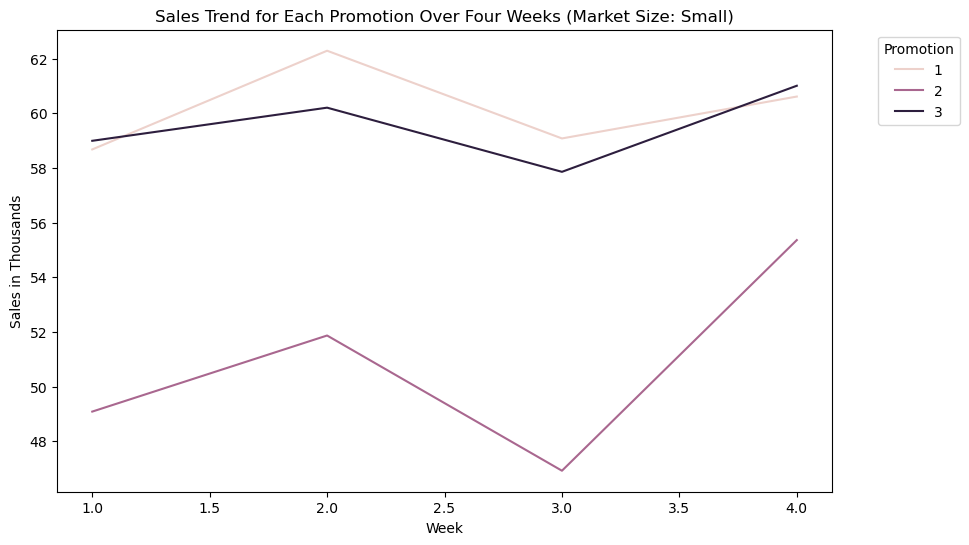

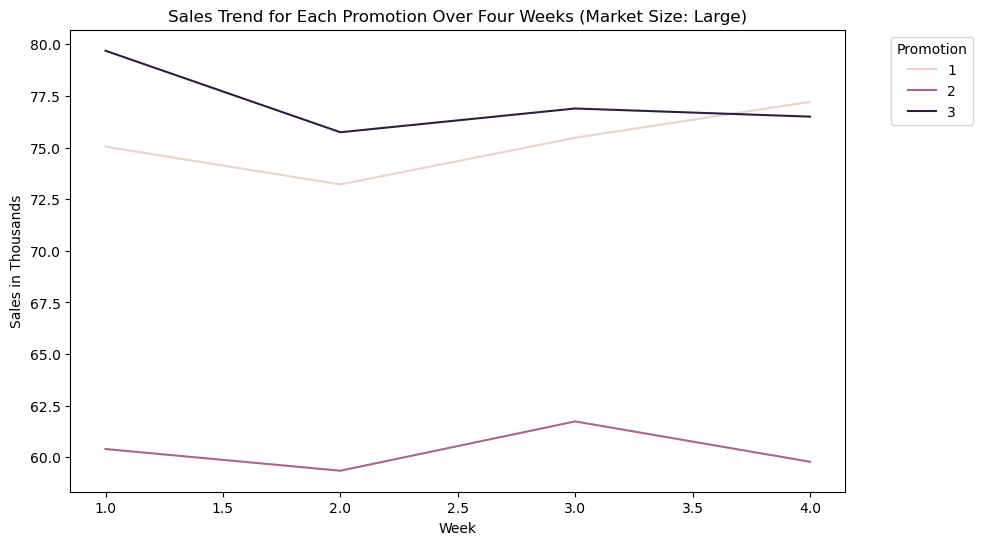

In [11]:
# Get unique market sizes
unique_market_sizes = df['MarketSize'].unique()

# Create separate line plots for each market size
for market_size in unique_market_sizes:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df[df['MarketSize'] == market_size], x='week', y='SalesInThousands', hue='Promotion', ci=None, markers=True, dashes=False)
    plt.title(f'Sales Trend for Each Promotion Over Four Weeks (Market Size: {market_size})')
    plt.xlabel('Week')
    plt.ylabel('Sales in Thousands')
    plt.legend(title='Promotion', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

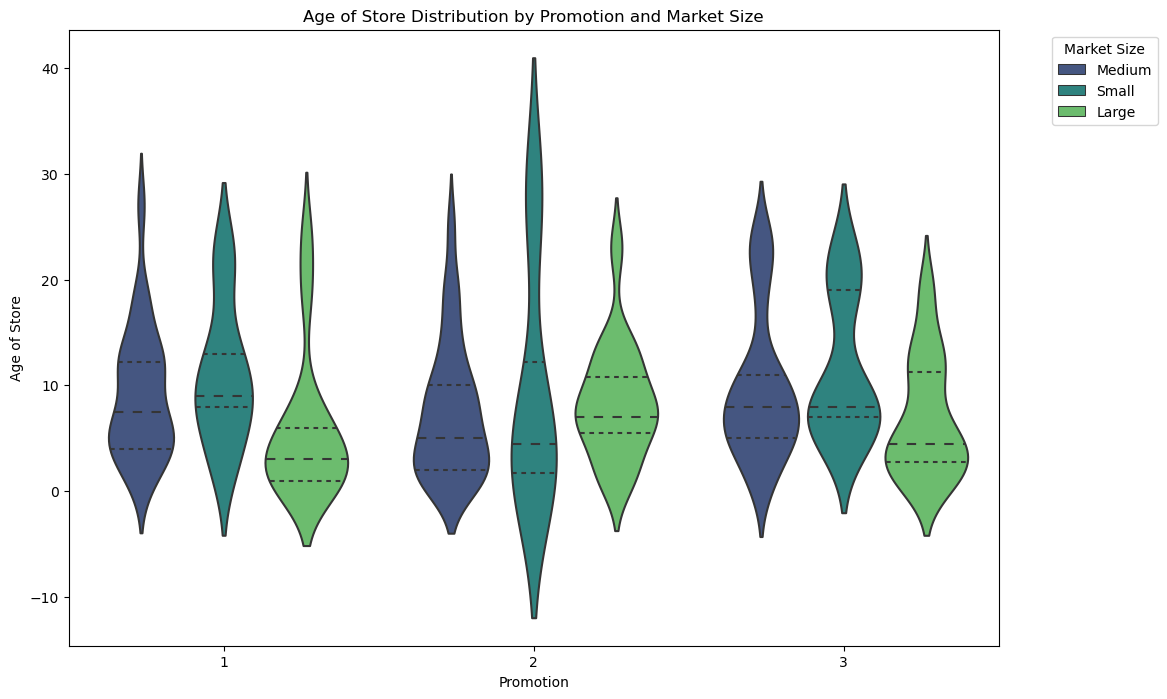

In [12]:
# Violin plot to observe the distribution of sales by promotion, market size, and age of store
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Promotion', y='AgeOfStore', hue='MarketSize',inner='quart', palette='viridis')
plt.title('Age of Store Distribution by Promotion and Market Size')
plt.xlabel('Promotion')
plt.ylabel('Age of Store')
plt.legend(title='Market Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x800 with 0 Axes>

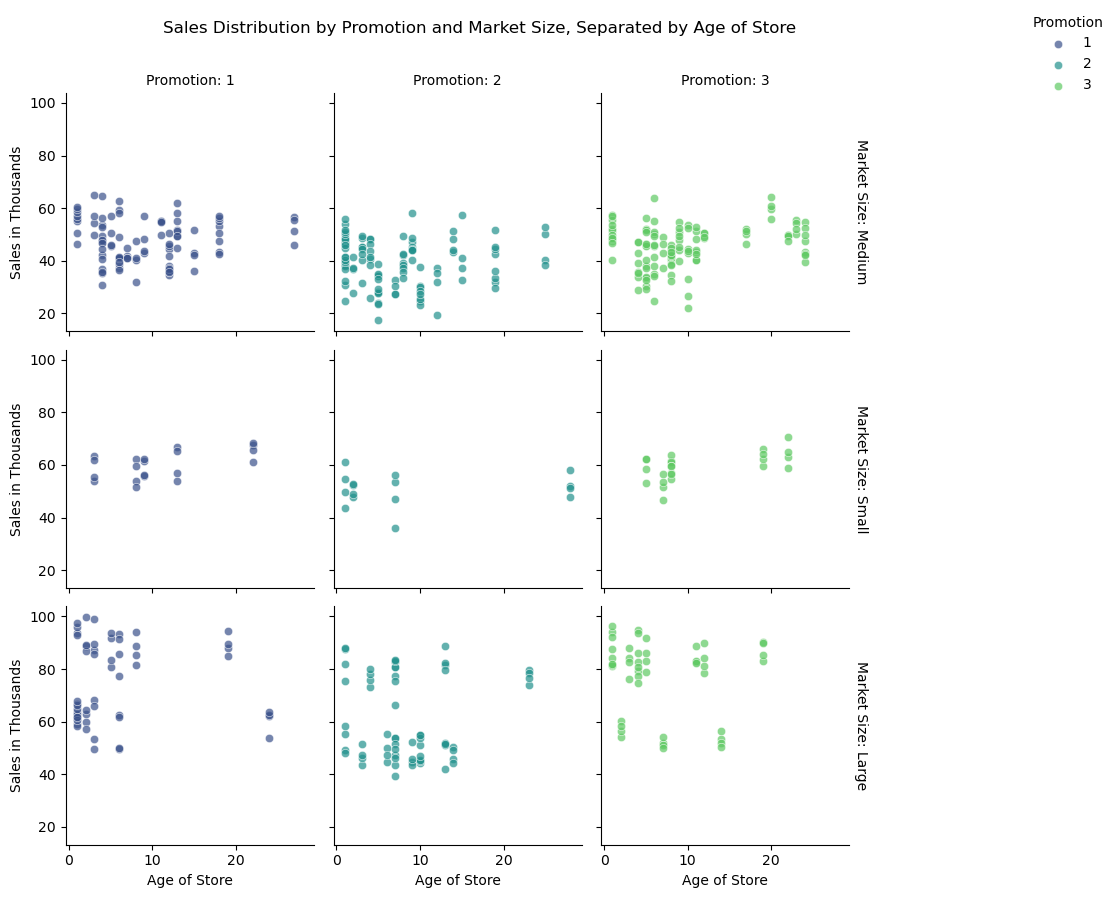

In [13]:
# Create separate scatter plots for each promotion and market size, based on the age of the store
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(df, col='Promotion', row='MarketSize', hue='Promotion', palette='viridis', margin_titles=True)
g.map(sns.scatterplot, 'AgeOfStore', 'SalesInThousands', alpha=0.7)
g.set_axis_labels('Age of Store', 'Sales in Thousands')
g.set_titles(col_template='Promotion: {col_name}', row_template='Market Size: {row_name}')
g.add_legend(title='Promotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.suptitle('Sales Distribution by Promotion and Market Size, Separated by Age of Store', y=0.98)
plt.show()

In [14]:
# Group the data by Promotion, MarketSize, and AgeOfStore, and calculate summary statistics
summary_stats = df.groupby(['Promotion', 'MarketSize'])['SalesInThousands'].describe()
summary_stats

count       mean        std    min      25%     50%  \
Promotion MarketSize                                                        
1         Large        56.0  75.235893  15.497497  49.62  62.2350  72.835   
          Medium       96.0  47.672604   8.067331  30.81  41.2150  47.425   
          Small        20.0  60.162500   5.127279  51.72  55.7800  61.145   
2         Large        64.0  60.322031  15.728529  39.36  47.1650  53.010   
          Medium      108.0  39.114352   8.807407  17.34  32.5100  39.765   
          Small        16.0  50.810625   5.869816  36.17  47.9200  51.600   
3         Large        48.0  77.203958  14.400304  50.05  71.1225  82.345   
          Medium      116.0  45.468879   8.091366  22.18  40.2800  46.295   
          Small        24.0  59.514167   5.212687  46.83  56.7150  59.745   

                          75%    max  
Promotion MarketSize                  
1         Large       89.2675  99.65  
          Medium      54.9900  65.11  
          Small       63.8900  68.42  
2         Large       77.5450  88.64  
          Medium      45.3300  58.10  
          Small       53.6800  61.25  
3         Large       86.5300  96.48  
          Medium      51.0300  64.14  
          Small       62.4350  70.60

In [15]:
df.groupby(['Promotion', 'MarketSize'])['AgeOfStore'].describe()

count       mean        std  min   25%  50%    75%   max
Promotion MarketSize                                                          
1         Large        56.0   5.857143   6.863417  1.0  1.00  3.0   6.00  24.0
          Medium       96.0   9.125000   6.144317  1.0  4.00  7.5  12.25  27.0
          Small        20.0  11.000000   6.521220  3.0  8.00  9.0  13.00  22.0
2         Large        64.0   8.437500   5.427370  1.0  5.50  7.0  10.75  23.0
          Medium      108.0   7.481481   6.338551  1.0  2.00  5.0  10.00  25.0
          Small        16.0   9.500000  11.278298  1.0  1.75  4.5  12.25  28.0
3         Large        48.0   6.916667   5.603317  1.0  2.75  4.5  11.25  19.0
          Medium      116.0   9.724138   6.836712  1.0  5.00  8.0  11.00  24.0
          Small        24.0  11.500000   6.639801  5.0  7.00  8.0  19.00  22.0

In [16]:
from scipy.stats import f_oneway
import scipy.stats as stats

# Extract sales data for each promotion
promotion_1_sales = df[df['Promotion'] == 1]['SalesInThousands']
promotion_2_sales = df[df['Promotion'] == 2]['SalesInThousands']
promotion_3_sales = df[df['Promotion'] == 3]['SalesInThousands']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(promotion_1_sales, promotion_2_sales, promotion_3_sales)

# Print the results of the initial one-way ANOVA
print("Results of the Initial One-Way ANOVA:")
print(f"  F-Statistic: {f_statistic:.3f}")
print(f"  p-value: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
    print("  The one-way ANOVA is statistically significant. We reject the null hypothesis.")
else:
    print("  The one-way ANOVA is not statistically significant. We fail to reject the null hypothesis.")

Results of the Initial One-Way ANOVA:
  F-Statistic: 21.953
  p-value: 0.000
  The one-way ANOVA is statistically significant. We reject the null hypothesis.


In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine all sales data for multiple comparison
all_sales_data = pd.concat([promotion_1_sales, promotion_2_sales, promotion_3_sales])

# Apply Bonferroni correction for multiple comparisons
tukey_results = pairwise_tukeyhsd(all_sales_data, df['Promotion'], 0.05)

print(tukey_results.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -1.9503  0.513 -6.1077 2.2072  False
     1      3  -1.4749 0.6822 -5.6324 2.6825  False
     2      3   0.4753 0.9592 -3.5887 4.5393  False
---------------------------------------------------


In [18]:
# Calculate eta-squared (η²)
mean_sales = df['SalesInThousands'].mean()
sst = sum((df['SalesInThousands'] - mean_sales) ** 2)
ssw = sum((df['SalesInThousands'] - df.groupby('Promotion')['SalesInThousands'].transform('mean')) ** 2)
eta_squared = ssw / sst

print(f"Effect size (eta-squared): {eta_squared:.3f}")

Effect size (eta-squared): 0.925


In [19]:
# Subset data for each market size and create a balanced subset
small_subset = df[df['MarketSize'] == 'Small'].sample(n=60, random_state=42)
medium_subset = df[df['MarketSize'] == 'Medium'].sample(n=60, random_state=42)
large_subset = df[df['MarketSize'] == 'Large'].sample(n=60, random_state=42)

# Concatenate the balanced subsets to create a new dataframe
balanced_df = pd.concat([small_subset, medium_subset, large_subset])

# Perform one-way ANOVA and Tukey's HSD for each market size separately
alpha = 0.05
for market_size, subset in df.groupby('MarketSize'):
    print(f"\nMarket Size: {market_size}")
    
    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(subset[subset['Promotion'] == 1]['SalesInThousands'],
                                    subset[subset['Promotion'] == 2]['SalesInThousands'],
                                    subset[subset['Promotion'] == 3]['SalesInThousands'])
    
    print(f"Results of the One-Way ANOVA:")
    print(f"  F-Statistic: {f_statistic:.3f}")
    print(f"  p-value: {p_value:.3f}")
    
    if p_value < alpha:
        print("The one-way ANOVA is statistically significant. We reject the null hypothesis.")
        
        # Perform Tukey's HSD test for multiple comparisons
        tukey_results = pairwise_tukeyhsd(subset['SalesInThousands'], subset['Promotion'], 0.05)
        print(tukey_results.summary())
    else:
        print("The one-way ANOVA is not statistically significant. We fail to reject the null hypothesis.")


Market Size: Large
Results of the One-Way ANOVA:
  F-Statistic: 21.445
  p-value: 0.000
The one-way ANOVA is statistically significant. We reject the null hypothesis.
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     1      2 -14.9139   0.0 -21.5279 -8.2998   True
     1      3   1.9681  0.79  -5.1418   9.078  False
     2      3  16.8819   0.0   9.9802 23.7837   True
----------------------------------------------------

Market Size: Medium
Results of the One-Way ANOVA:
  F-Statistic: 29.688
  p-value: 0.000
The one-way ANOVA is statistically significant. We reject the null hypothesis.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -8.5583    0.0 -11.3107 -5.8058   True
     1      3  -2.2037 0.1356  -4.9111  0.5037  False
     2      3   6.3545

In [20]:
df.groupby(['Promotion', 'MarketSize'])['SalesInThousands'].describe()

count       mean        std    min      25%     50%  \
Promotion MarketSize                                                        
1         Large        56.0  75.235893  15.497497  49.62  62.2350  72.835   
          Medium       96.0  47.672604   8.067331  30.81  41.2150  47.425   
          Small        20.0  60.162500   5.127279  51.72  55.7800  61.145   
2         Large        64.0  60.322031  15.728529  39.36  47.1650  53.010   
          Medium      108.0  39.114352   8.807407  17.34  32.5100  39.765   
          Small        16.0  50.810625   5.869816  36.17  47.9200  51.600   
3         Large        48.0  77.203958  14.400304  50.05  71.1225  82.345   
          Medium      116.0  45.468879   8.091366  22.18  40.2800  46.295   
          Small        24.0  59.514167   5.212687  46.83  56.7150  59.745   

                          75%    max  
Promotion MarketSize                  
1         Large       89.2675  99.65  
          Medium      54.9900  65.11  
          Small       63.8900  68.42  
2         Large       77.5450  88.64  
          Medium      45.3300  58.10  
          Small       53.6800  61.25  
3         Large       86.5300  96.48  
          Medium      51.0300  64.14  
          Small       62.4350  70.60